<h1 style="color: #14549C">Jarque-Bera</h1>

### Introducción
El estadístico de Jarque-Bera es una prueba que determina si la curtosis y asimetría de una muestra sigue una distribución normal.
> <h2> $JB = n \Big[ \frac{S^2}{6}+\frac{(K-3)^2}{24} \Big]$ </h2>
>
> Donde:
- S: Asimetría (Skewness)
- K: Curtosis (kurtosis)

<img src="Images/JB_pvalues.PNG">

## Ejemplo

En el siguiente Dataset (Calificaciones.xlsx) estan las calificaciones de un grupo de estudiantes en Matemáticas, Español y Física.

#### 1) Haz un analísis rápido de los datos

In [36]:
#Librerias usadas
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel("Datasets/Calificaciones.xlsx")

In [4]:
data.head()

,Matemáticas,Español,Física
0,73,91,79
1,77,99,85
2,88,99,92
3,74,90,80
4,95,100,97


In [10]:
#Medidas de tendencia central y dispersión básicas
data.describe()

,Matemáticas,Español,Física
count,38.000000,38.000000,38.000000
mean,71.815789,88.000000,77.473684
std,17.139894,12.996881,11.303520
min,42.000000,50.000000,59.000000
25%,58.000000,81.000000,68.250000
50%,72.500000,94.000000,74.000000
75%,86.000000,97.750000,87.500000
max,100.000000,100.000000,99.000000


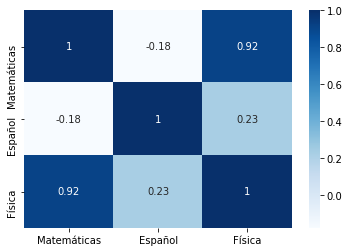

In [12]:
#Correlación entre los datos
sns.heatmap(data.corr(), annot=True, cmap="Blues")

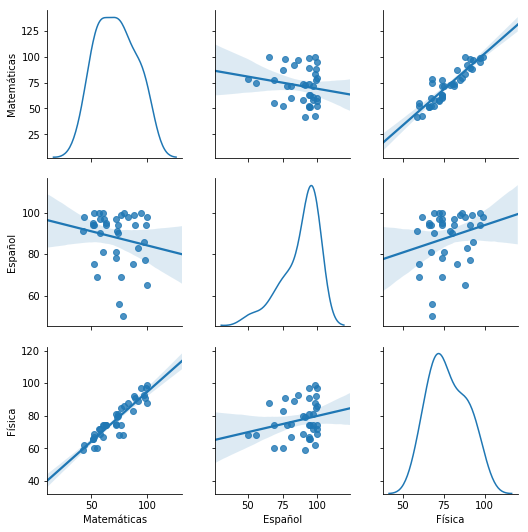

In [15]:
#Distribución y correlación entre los datos
sns.pairplot(data, kind="reg", diag_kind="kde")

> Interpretación de los resultados
>
> Primeramente, es importante mencionar que las principales variables candidatas a distribuirse de forma normal son las correspondientes a las calificaciones de Matemáticas y Física, además de que parece haber correlación entre ambas.

###### 2) Usa la prueba de Jarque-Bera para averiguar si las calificaciones se distribuyen de forma normal

In [56]:
#Jarque Bera
"""Como la muestra es de 38 alumnos, el p-valor asociado al estadístico de 
prueba Jarque-Bera para un nivel de confianza del 95% (alpha = 0.05) es de
p = 0.109"""

def JB(X):
    a = ss.jarque_bera(X)
    
    if a[1] >= 0.109:
        return "Como el p-valor de la prueba de JB es superior a 0.109, los datos se distribuyen normalmente " + "p-valor: " + str(round(a[1],3)) 
    else:
        return "No hay evidencia suficiente para decir que los datos se distribuyen de forma normal" + "p-valor: " + str(round(a[1],3))
    
#Matemáticas 
print("Matemáticas:", JB(data["Matemáticas"]), "\n")

#Español
print("Español:", JB(data["Español"]), "\n")

#Física
print("Física:", JB(data["Física"]), "\n")

Matemáticas: Como el p-valor de la prueba de JB es superior a 0.109, los datos se distribuyen normalmente p-valor: 0.373 

Español: No hay evidencia suficiente para decir que los datos se distribuyen de forma normalp-valor: 0.003 

Física: Como el p-valor de la prueba de JB es superior a 0.109, los datos se distribuyen normalmente p-valor: 0.38 



#### 3) Física y Matemáticas son dos materias muy parecidas, demuestra que existe correlación entre las variables y desarrolla un modelo que explique la calificación esperada en una materia, dados los resultados en la otra.

> Para esto se utilzará un modelo de mínimos cuadrados ordinarios de la siguiente forma:
>
> <h3> $F = B_0 + B_1 M +u_i $ </h3>
>
> Donde:
- $F$: Física
- $M$: Matemáticas
- $B_0$: Intercepto
- $B_1$: Coeficiente
- $u_i$: Error

In [42]:
F = data["Física"]
M = data["Matemáticas"]
M = sm.add_constant(M)

#linear model
lm = sm.OLS(F, M).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Física   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     188.8
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           6.90e-16
Time:                        04:21:10   Log-Likelihood:                -110.77
No. Observations:                  38   AIC:                             225.5
Df Residuals:                      36   BIC:                             228.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          34.0704      3.245     10.498      0.000      27.488      40.653
Matemáticas     0.6044      0.044     13.739      0.000       0.515       0.694
==============================================================================
Omnibus:                       11.415   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.952
Skew:                          -1.232   Prob(JB):                      0.00419
Kurtosis:                       3.917   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


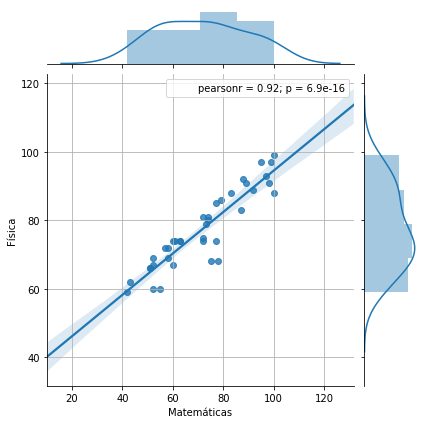

In [59]:
sns.jointplot(x="Matemáticas", y="Física", data=data, kind="reg", truncate=False)
plt.grid()
plt.show()

In [57]:
#Normlaidad de los residuos
print("Residuos del modelo lineal: \n    ", JB(lm.resid))
    #Tambien, el JB esta en el modelo estimado.

Residuos del modelo lineal: 
     No hay evidencia suficiente para decir que los datos se distribuyen de forma normalp-valor: 0.004


###### Resultados

> <h3> $F = 34.07 + 0.604 M $ </h3>
>
> Intrepretación: Por cada $10$ puntos obtenidos en Matemátiacas, se espera que el estudiante obtenga $6.04$ puntos en física

El coeficiente del modelo, el intercepto y el model en su conjunto son significativos a nivel estadístico, tal y como se puede apreciar en sus p-valores correspondientes que son menores al 5%.

El estadístico Durbin-Watson es de 1.446 por lo que no parece haber un problema de autocorrelación.

El único problema parece ser que los residuos del modelo no se distribuyen de forma normal. Pero no hay problema, siempre y cuando no se busquen hacer inferencias con datos nuevos fuera del rango muestral del modelo (entre 42 y 100 puntos en matemáticas).

### Fuentes:
- Gujarati & Porter (2010) Pruebas de normalidad. Econometría (5ta Edición). McGraw-Hill Education. Ciduad de México.
- Scipy.org (2019) scipy.stats.jarque_bera. Consultado el 15 de junio de 2020 de: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html
- (note: "shame on me") Wikipedia (2020) Jarque–Bera test. Consultado el 15 de junio de 2020 de:  https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test
- Los datos de las calificaciones son ficticios y obtenidos por elaboración propia